## Import

In [1]:
import torch
import torchvision
from torch import nn
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

## Entrenament amb random forest 

En aquest entrenament volem observar les prediccions de les features que tenen a veure amb el terra de les vivendes

In [2]:
# Preparem el dataset amb les features d'interes
data = pd.read_csv('Processed_dataset.csv', index_col=0).reset_index(drop=True)
flors = [x for x in data.columns if 'floor' in x]
flors.append('score')
dt_floors=data[flors]
dt_floors

,aggregate_floor,concrete_floor,floor_ceiling,floor_ceiling_windows,hardwood_floor,parquet_floor,tile_floor,score
0,0,0,0,0,1,0,0,3.5
1,0,1,0,0,0,0,0,3.5
2,0,0,0,0,1,0,0,3.9
3,0,1,0,0,0,0,0,3.9
4,0,0,0,0,1,0,0,3.4
...,...,...,...,...,...,...,...,...
1671,0,0,0,0,0,0,0,3.4
1672,0,0,0,0,1,0,0,3.4
1673,0,0,0,0,0,0,1,3.8
1674,0,0,0,0,0,0,0,4.5


In [3]:
# Divisió de les dades en conjunts d'entrenament i prova (80% entrenament, 20% prova)
y=dt_floors['score']
X=dt_floors.drop('score',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Mean Squared Error: 0.5399380916789797
R2 Score: 0.04224549103574826


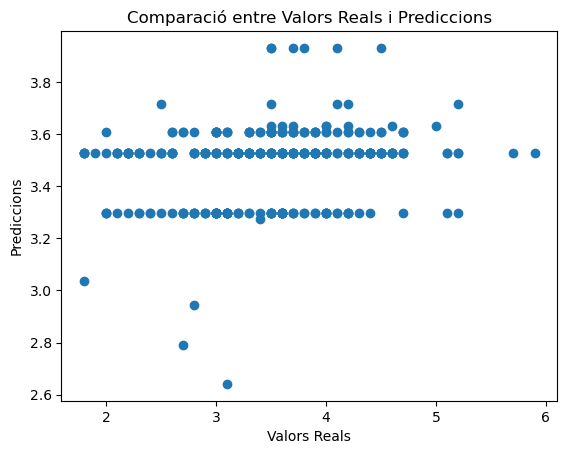

In [4]:
# Inicialitza el regressor Random Forest
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrena el model
rf_regressor.fit(X_train, y_train)

# Prediu amb les dades de prova
y_pred = rf_regressor.predict(X_test)

# Avalua el model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

# Visualitza la comparació entre les prediccions i les dades reals
plt.scatter(y_test, y_pred)
plt.xlabel("Valors Reals")
plt.ylabel("Prediccions")
plt.title("Comparació entre Valors Reals i Prediccions")
plt.show()

En aquest entrenament volem observar les prediccions de les features que tenen a veure amb el garatge de les vivendes

In [5]:
garage = [x for x in data.columns if 'garage' in x]
garage.append('score')
dt_garage=data[garage]

In [6]:
# Divisió de les dades en conjunts d'entrenament i prova (80% entrenament, 20% prova)
y=dt_garage['score']
X=dt_garage.drop('score',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Mean Squared Error: 0.5635104542131011
R2 Score: 0.00043229642710118643


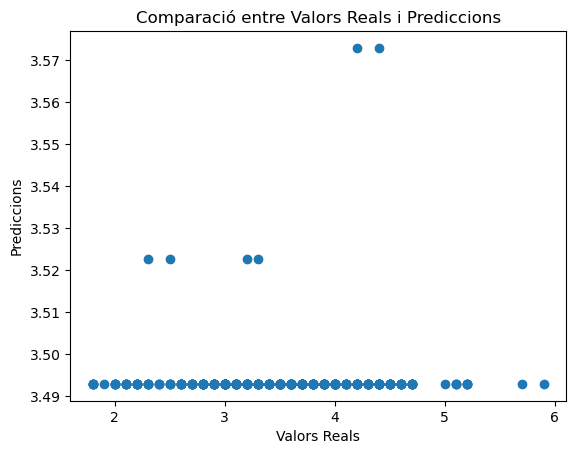

In [7]:
# Inicialitza el regressor Random Forest
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrena el model
rf_regressor.fit(X_train, y_train)

# Prediu amb les dades de prova
y_pred = rf_regressor.predict(X_test)

# Avalua el model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

# Visualitza la comparació entre les prediccions i les dades reals
plt.scatter(y_test, y_pred)
plt.xlabel("Valors Reals")
plt.ylabel("Prediccions")
plt.title("Comparació entre Valors Reals i Prediccions")
plt.show()